In [57]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, LSTM, TimeDistributed, ConvLSTM2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import pyproj
pd.set_option('display.max_columns', None)

base = 'C:/Users/Antonin_JOLY/Desktop/Kowa_gait_behaviour/ExtraSensory.per_uuid_features_labels'

listdir = os.listdir(base)
li = []

for idx, filename in enumerate(listdir):
    df = pd.read_csv(os.path.join(base,filename))
    df['subject'] = [idx for i in range(df.shape[0])]
    li.append(df)
data = pd.concat(li, axis=0, ignore_index=True).set_index('subject')
del data['timestamp']

In [58]:
target_col = [i.replace('label:','') for i in data.columns if 'label' in i]
train_col = [i for i in data.columns if 'label' not in i]

In [59]:
# 'location:num_valid_updates',
# 'location:log_latitude_range',
# 'location:log_longitude_range',
# 'location:min_altitude',
# 'location:max_altitude',
# 'location:min_speed',
# 'location:max_speed',
# 'location:best_horizontal_accuracy',
# 'location:best_vertical_accuracy',
# 'location:diameter',
# 'location:log_diameter',
# 'location_quick_features:std_lat',
# 'location_quick_features:std_long',
# 'location_quick_features:lat_change',
# 'location_quick_features:long_change',
# 'location_quick_features:mean_abs_lat_deriv',
# 'location_quick_features:mean_abs_long_deriv'

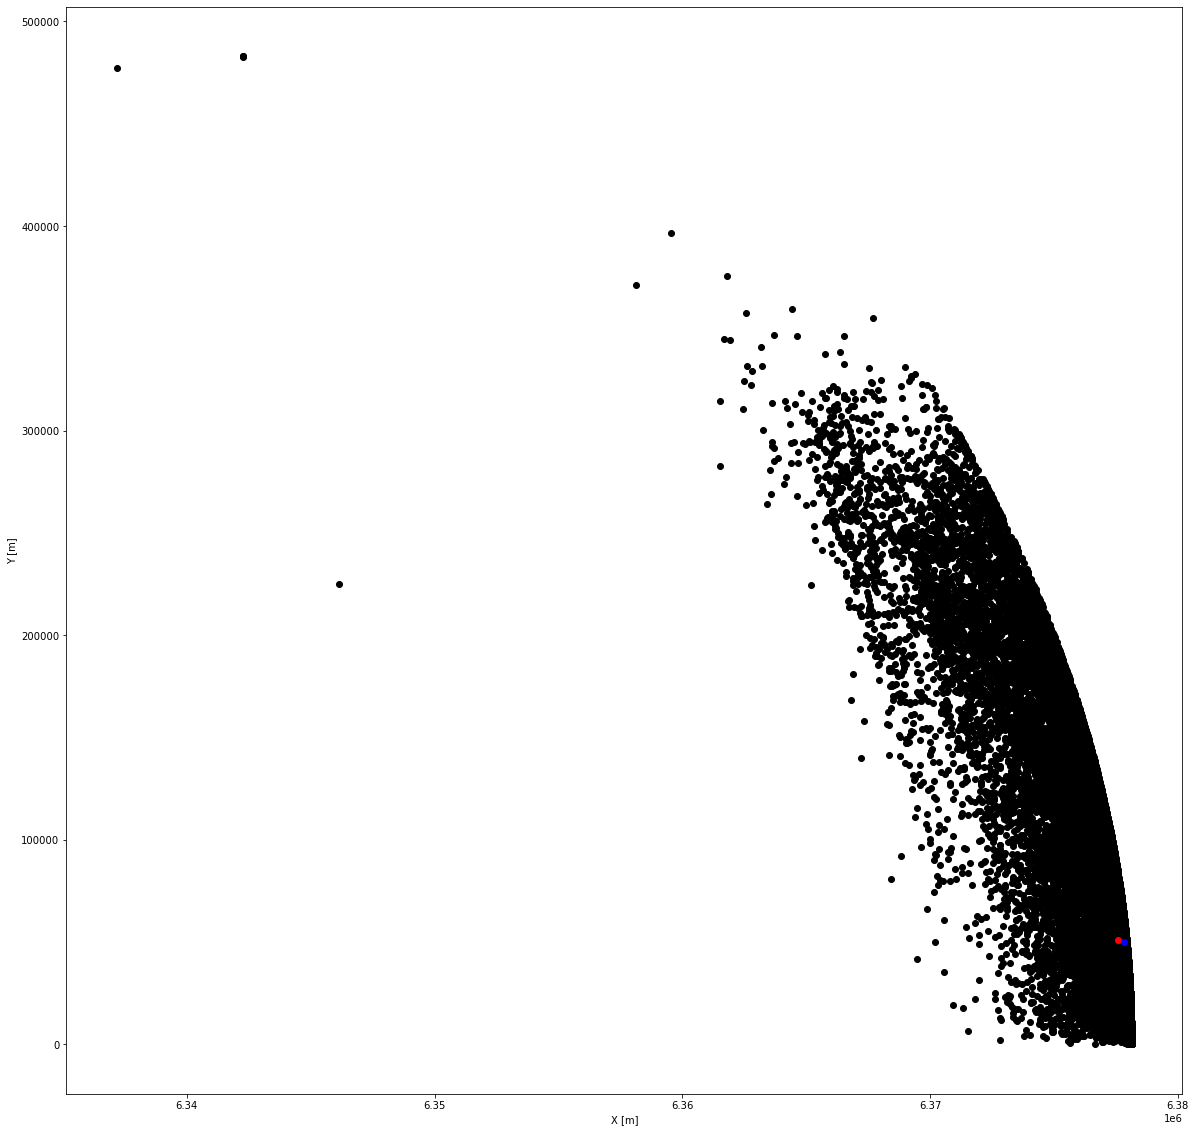

In [67]:
def gps_to_ecef_pyproj(lat, lon, alt):
    ecef = pyproj.Proj(proj='geocent', ellps='WGS84', datum='WGS84')
    lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
    x, y, z = pyproj.transform(lla, ecef, lon, lat, alt, radians=False)
    return x, y, z

def plot_traj(data):
    for idx, s in enumerate(np.unique(data.index)):
        try:
            lat, lon = data.loc[s,'location:log_latitude_range'], data.loc[s,'location:log_longitude_range']
            x,y,_ = gps_to_ecef_pyproj(lat.to_numpy(), lon.to_numpy(), np.array([0 for i in range(len(lat))]))

            plt.plot(x, y, 'ko')
            plt.plot(x[0],y[0],'ro')
            plt.plot(x[-1],y[-1],'bo')
            plt.xlabel('X [m]')
            plt.ylabel('Y [m]')
        except:
            pass
    plt.show()

plt.figure(figsize=(20,20))
plot_traj(data)